# "The Darvish Effect: Perceived Rarity in the New MLB"

- toc: false
- badges: true
- comments: true
- categories: [sports, data science]
- image: 

## Abstract
On September 17, 2019, Yu Darvish recorded eight consecutive strikeouts for the Chicago Cubs. It was clear that this was regarded by the broadcast crew as tremendously rare, and much historical context was given &mdash; including reference to the MLB record of ten consecutive strikeouts by Tom Seaver in 1970. Given that one of the most significant changes in baseball over the past several decades is the increase in strikeout rate, I was curious to find out how much more likely such an occurrence is today versus 50 years ago. 

In the end, what I find is that we're living in a time where the frequency of such events is increasing exponentially, and so looking back is bound to deceive. Finally, I show that the empirical data does fit this model fairly well, and if current trends continue this effect is about to become much more noticeable.
[](images/k5_projected_actual.png)

## Getting started
In order to find the expected rate of incidence, we first need to establish:

1. How many **opportunities** are there? I.e. for potential streak length X, a given pitcher in each game has \[total batters faced - X] opportunities to begin such a streak

2. How likely is this streak to materialize? If our pitcher on average strikes out 25% of all batters he faces, the odds of striking out any string of eight batters in consecutive fashion is 0.25^8, or about 1 in 66,000.

To that end, it was easy enough to get [FanGraphs](https://www.fangraphs.com/leaders.aspx?pos=all&stats=sta&lg=all&qual=0&type=0&season=2020&month=0&season1=1900&ind=0&team=0,ss&rost=0&age=0&filter=&players=0&startdate=1900-01-01&enddate=2020-12-31) to spit out a table of all the usual pitching stats, SP only, MLB-wide, by year since 1900.

This does not include Batters Faced, but we can back that out using BF = 3*IP + H + BB + HBP. From there, we just need to back out the 'K rate' using K / BF.

In [2]:
#collapse-hide
import pandas as pd
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

raw_stats = 'C:/Users/tmaul/Documents/GitHub/website/assets/raw_data/fan_graphs_sp_data.csv'
cols_to_use = ['Season', 'GS', 'IP', 'H', 'BB', 'HBP', 'SO']
# drop 2020 due to shortened season
sp_data_fg = pd.read_csv(raw_stats, usecols=cols_to_use, index_col='Season').rename(columns={'SO' : 'K'}).drop(2020)
sp_data_fg['BF_est'] = sp_data_fg.IP*3 + sp_data_fg.H + sp_data_fg.BB + sp_data_fg.HBP
sp_data_fg['BF_per_start_est'] = sp_data_fg.BF_est/sp_data_fg.GS
sp_data_fg['K_rt_SP'] = sp_data_fg.K/sp_data_fg.BF_est
sp_data_fg
# this is a limited approximation bc of RPs

,GS,H,BB,IP,HBP,K,BF_est,BF_per_start_est,K_rt_SP
Season,,,,,,,,,
1900,1131,10711,2942,9743.00,516,2643,43398.00,38.37,0.06
1901,2217,20819,5420,19457.10,874,6954,85484.30,38.56,0.08
1902,2225,20144,5367,19559.20,761,6595,84949.60,38.18,0.08
1903,2226,19640,5390,19532.20,750,7923,84376.60,37.91,0.09
1904,2492,20174,5676,21830.00,800,9250,92140.00,36.97,0.10
...,...,...,...,...,...,...,...,...,...
2015,4858,28040,8518,28223.10,1040,23218,122267.30,25.17,0.19
2016,4856,27452,9004,27412.20,993,23619,119685.60,24.65,0.20
2017,4860,26919,9330,26787.10,1040,23691,117650.30,24.21,0.20


## A pastime unlike the past
Now that we have all of the necessary numbers in place, let's take a look at some basic trends. As expected, the 'K rate' has increased dramatically in the last 100 years. However, we can also see that the average starting pitcher in 1900 faced almost twice as many batters as today, and this diminished opportunity will counteract the surge in punch-outs to some extent.

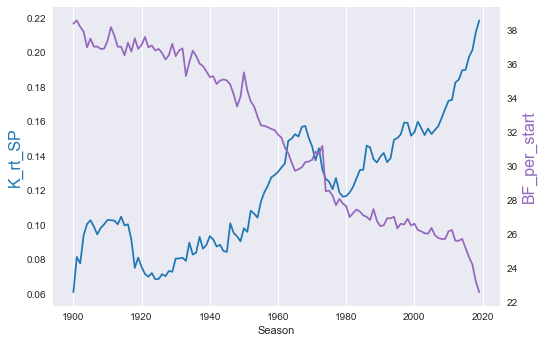

In [3]:
#collapse-hide
import matplotlib as plt
# plt.rcdefaults()
plt.style.use('seaborn')
ax = sp_data_fg.plot(y='K_rt_SP', legend=None, color='tab:blue');
ax.set_ylabel('K_rt_SP', fontsize=16, color='tab:blue');
ax2 = ax.twinx();
sp_data_fg.plot(y='BF_per_start_est', ax=ax2, legend=None, color='tab:purple');
ax2.set_ylabel('BF_per_start', fontsize=16, color='tab:purple');
ax.grid(b=False, axis='y'); ax2.grid(b=False, axis='y');

## Results and discussion
All that's left to do now is calculate the theoretical rate of incidence (shown below for X = 5, 8). A few interesting results:

* With the rise of the strikeout, the expected number of K streaks is growing exponentially, in particular since 2000.

* We can see that the Darvish Effect is inevitable: something that has only happened a handful of times in MLB history **sounds like** a generational anomaly, and yet we can show that in today's game it will be orders of magnitude more common.

* In numerical terms: 50 years ago, we would expect a pitcher to record eight consecutive strikeouts just once in 57 MLB seasons. As of 2019, we can now expect once in 2.5 seasons.

* Drawing a direct comparison between Seaver's MLB record and Darvish's eight, we see that the former is almost 1200x less likely in expectation.

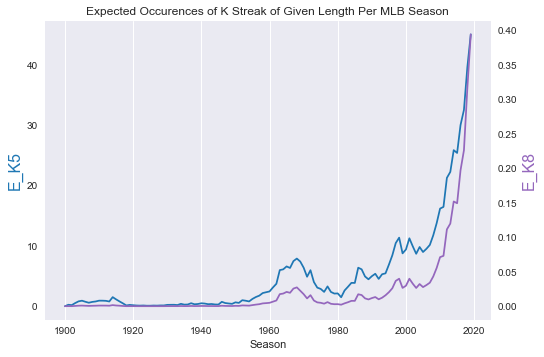

In [4]:
#collapse-hide
sp_data_fg['E_K5'] = sp_data_fg.GS*(sp_data_fg.BF_per_start_est-4)*sp_data_fg.K_rt_SP**5
sp_data_fg['E_K8'] = sp_data_fg.GS*(sp_data_fg.BF_per_start_est-7)*sp_data_fg.K_rt_SP**8
sp_data_fg['E_K10'] = sp_data_fg.GS*(sp_data_fg.BF_per_start_est-9)*sp_data_fg.K_rt_SP**10

ax = sp_data_fg.plot(y='E_K5', legend=None, color='tab:blue');
ax.set_ylabel('E_K5', color='tab:blue', fontsize=16);
ax2 = ax.twinx();
sp_data_fg.plot(y='E_K8', ax=ax2, color='tab:purple', legend=None);
ax2.set_ylabel('E_K8', color='tab:purple', fontsize=16);
ax.grid(b=False, axis='y'); ax2.grid(b=False, axis='y');
ax.set_title('Expected Occurences of K Streak of Given Length Per MLB Season');

In [19]:
#collapse-hide
seaver = sp_data_fg.E_K10[1970]
darvish = sp_data_fg.E_K8[2019]
K8_1970 = sp_data_fg.E_K8[1970]
print(f'1970: Expected one K8 streak every {round(1/K8_1970, 1)} seasons.')
print(f'2019: Expected one K8 streak every {round(1/darvish, 1)} seasons.')
print(f'Seaver\'s K10: about {int(darvish/seaver)} times less likely than Darvish\'s K8')

1970: Expected one K8 streak every 57.2 seasons.
2019: Expected one K8 streak every 2.5 seasons.
Seaver's K10: about 1164 times less likely than Darvish's K8


## Limitations and areas of further exploration
1. This analysis only uses MLB-wide 'K rate' as an input &mdash; this is a major simplification. In reality, there will be above and below-average pitchers, and since the 'K rate' is compounded, this should result in **more** observed streaks than our estimates. Furthermore, pitchers who are better than average and/or already having a great outing are more likely to remain in the game, and face more batters.

    a. In the following section, we confirm this hypothesis using actual play-by-play logs

2. As mentioned earlier, our source data only covers Starting Pitchers. This is fairly reasonable, as our chief concern was starters to begin with and, especially for streaks on the longer end, relievers are likely not much of a factor anyway.

3. Using game logs from RetroSheet (or other data?), it should be theoretically possible to produce the exact number of observed K streaks per season.

4. We could attempt a less stylized, more rigorous analysis by building some approximate underlying distributions for 'K rate' among pitcher population and expected number and length of outings for each respective pitcher, then simulating outcomes.

## Appendix: Empirical results using Retrosheet
The best way (that I know of) to produce empirical streak data is by scraping the event logs maintained by [Retrosheet](https://www.retrosheet.org/game.htm). Although Retrosheet has logged every Major League game since 1871, reading every one of them is no small task. Here, we will start by unpacking one team, one season, before trying to scale up.

To start, let's parse the play-by-play file for the 2019 Chicago Cubs. We'll flag the start of each new game, as well as any notable streaks:

In [17]:
#collapse-hide
events = 'C:/Users/tmaul/Documents/GitHub/website/assets/raw_data/2019CHN.EVN'
########|Parse generic event file|########
col_names = ['type', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']
df = pd.read_table(events, sep=',', names=col_names)
#there are eleven possible event types, each of whitch contains at most 6 columns of info, we label these f1-f6
#detailed description of all event types and associated field can be found at retrosheet.org
#this season (2019 Cubs home games) contains 13,859 events
plays_to_ignore = ['NP', 'CS', 'BK', 'PB', 'WP', 'PO', 'SB']
k_streak_threshold = 5 # variable

for index, row in df.iterrows():
    if row['type'] == 'id':
        game_id = row['f1']
    elif row['type'] == 'info':
        if row['f1'] == 'hometeam':
            h_team = row['f2']
        elif row['f1'] == 'visteam':
            a_team = row['f2']
        elif row['f1'] == 'date':
            game_date = pd.to_datetime(row['f2']).date() 
            print(f'{game_date}: {a_team} @ {h_team}')
    elif row['type'] == 'start' and row['f5'] == '1': # only care if SP declared
        if row['f3'] == '0':
            a_pitch = row['f1']
            a_streak = {a_pitch : 0}
        else:
            h_pitch = row['f1']
            h_streak = {h_pitch : 0}
    elif row['type'] == 'play':
        if row['f2'] == '0': # 0 means away *batter* means home pitcher
            p = h_pitch
        else:
            p = a_pitch
        if row['f6'][0] == 'K': # identify a strikeout (there *can* be modifiers after K so take 0th)   
            if p in h_streak:
                h_streak[p] += 1
                if h_streak[p] >= k_streak_threshold:
                    print('***K_STREAK_LENGTH ', h_streak[p], ' BY ', p, 'PITCHING FOR ', h_team, ' ***')
            elif p in a_streak:
                a_streak[p] += 1
                if a_streak[p] >= k_streak_threshold:
                    print('***K_STREAK_LENGTH ', a_streak[p], ' BY ', p, 'PITCHING FOR ', a_team, ' ***')
        elif row['f6'][0:2] in plays_to_ignore: # these 'play' events do not constitute a plate app, ignore
            continue
        else: # zero out the streak if a real non-K play
            if p in h_streak:
                h_streak[p] = 0
            elif p in a_streak:
                a_streak[p] = 0
    elif row['type'] == 'sub' and row['f5'] == '1':
        if row['f3'] == '0':
            a_pitch = row['f1']
            a_streak = {a_pitch : 0}
        else:
            h_pitch = row['f1']
            h_streak = {h_pitch : 0}

2019-04-08: PIT @ CHN
2019-04-10: PIT @ CHN
2019-04-11: PIT @ CHN
2019-04-12: ANA @ CHN
2019-04-13: ANA @ CHN
2019-04-19: ARI @ CHN
2019-04-20: ARI @ CHN
2019-04-21: ARI @ CHN
2019-04-23: LAN @ CHN
2019-04-24: LAN @ CHN
2019-04-25: LAN @ CHN
2019-05-03: SLN @ CHN
2019-05-04: SLN @ CHN
2019-05-05: SLN @ CHN
2019-05-06: MIA @ CHN
2019-05-07: MIA @ CHN
***K_STREAK_LENGTH  5  BY  smitc006 PITCHING FOR  MIA  ***
2019-05-08: MIA @ CHN
2019-05-09: MIA @ CHN
2019-05-10: MIL @ CHN
2019-05-11: MIL @ CHN
2019-05-12: MIL @ CHN
2019-05-20: PHI @ CHN
2019-05-21: PHI @ CHN
2019-05-22: PHI @ CHN
2019-05-23: PHI @ CHN
2019-05-24: CIN @ CHN
2019-05-25: CIN @ CHN
2019-05-26: CIN @ CHN
2019-06-03: ANA @ CHN
2019-06-04: COL @ CHN
***K_STREAK_LENGTH  5  BY  hendk001 PITCHING FOR  CHN  ***
2019-06-05: COL @ CHN
2019-06-06: COL @ CHN
2019-06-07: SLN @ CHN
2019-06-08: SLN @ CHN
2019-06-09: SLN @ CHN
2019-06-18: CHA @ CHN
2019-06-19: CHA @ CHN
2019-06-20: NYN @ CHN
2019-06-21: NYN @ CHN
2019-06-22: NYN @ CHN
20

The theoretical results above suggested 45 5-K streaks in 2019, so about 1.5 per ballpark. Wrigley Field comes in a bit higher at four, but let's try to get more data efore drawing any conclusions.

RetroSheet has over 2,000 of these log files in total (20-30 teams, 100 seasons). In order to make this manageable we will:

1. Condense the files in to one megafile per year using command line.

2. Read the remaining files in bulk using a for loop, and store the results as a DataFrame.

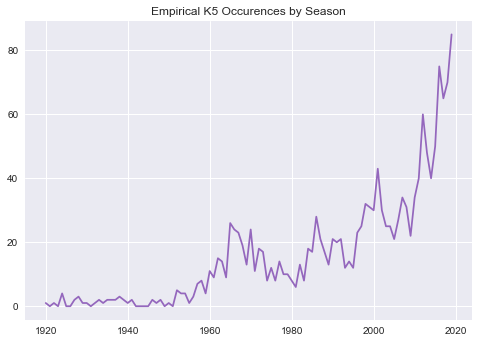

In [91]:
#collapse-hide
#the csv of empirical data was generated in the following manner:
# 1. downloaded .zip file for each decade from retrosheet
# 2. used Powershell to concatenate all event files into one giant .txt per season
stored_data = raw_stats = 'C:/Users/tmaul/Documents/GitHub/website/assets/raw_data/empirical_K5_by_season.csv'
final_counts = pd.read_csv(stored_data, index_col=0)
ax = final_counts.plot(legend=None, color='tab:purple');
ax.set_title('Empirical K5 Occurences by Season');

######|Powershell|########
# PS C:\Users\tmaul\Documents\eCornell\Retrosheet_Data\2010s> $yr = "2019"; $path = $yr + "_all.txt"
# PS C:\Users\tmaul\Documents\eCornell\Retrosheet_Data\2010s> cat $yr*.EVN > all_teams_NL.txt; cat $yr*.EVA > all_teams_AL.txt; cat all_teams*.txt > $path; $yr = "2018"; $path = $yr + "_all.txt"
######|Jupyter|########
# years_to_map = range(2010, 2019) #one decade at a time
# year_k_map = dict()

# for this_yr in years_to_map:
#     this_yr_file = f'C:/Users/tmaul/Documents/eCornell/Retrosheet_Data/2010s/{this_yr}_all.txt'
#     ########|Parse generic event file|########
#     col_names = ['type', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']
#     df = pd.read_table(this_yr_file, sep=',', names=col_names, encoding='utf_16')
#     #there are eleven possible event types, each of whitch contains at most 6 columns of info, we label these f1-f6
#     #detailed description of all event types and associated field can be found at retrosheet.org
#     plays_to_ignore = ['NP', 'CS', 'BK', 'PB', 'WP', 'PO', 'SB']
#     k_streak_threshold = 5 # variable
#     num_streaks = 0

#     for index, row in df.iterrows():
#         if row['type'] == 'id':
#             game_id = row['f1']
#         elif row['type'] == 'info':
#             if row['f1'] == 'hometeam':
#                 h_team = row['f2']
#             elif row['f1'] == 'visteam':
#                 a_team = row['f2']
#             elif row['f1'] == 'date':
#                 game_date = pd.to_datetime(row['f2']).date() 
#                 # print(f'{game_date}: {a_team} @ {h_team}')
#         elif row['type'] == 'start' and row['f5'] == '1': # only care if SP declared
#             if row['f3'] == '0':
#                 a_pitch = row['f1']
#                 a_streak = {a_pitch : 0}
#             else:
#                 h_pitch = row['f1']
#                 h_streak = {h_pitch : 0}
#         elif row['type'] == 'play':
#             if row['f2'] == '0': # 0 means away *batter* means home pitcher
#                 p = h_pitch
#             else:
#                 p = a_pitch
#             if row['f6'][0] == 'K': # identify a strikeout (there *can* be modifiers after K so take 0th)   
#                 if p in h_streak:
#                     h_streak[p] += 1
#                     if h_streak[p] >= k_streak_threshold:
#                         if h_streak[p] == k_streak_threshold:
#                             num_streaks += 1
#                         # print('***K_STREAK_LENGTH ', h_streak[p], ' BY ', p, 'PITCHING FOR ', h_team, ' *** -->', num_streaks)
#                 elif p in a_streak:
#                     a_streak[p] += 1
#                     if a_streak[p] >= k_streak_threshold:
#                         if a_streak[p] == k_streak_threshold:
#                             num_streaks += 1
#                         # print('***K_STREAK_LENGTH ', a_streak[p], ' BY ', p, 'PITCHING FOR ', a_team, ' *** -->', num_streaks)
#             elif row['f6'][0:2] in plays_to_ignore: # these 'play' events do not constitute a plate app, ignore
#                 continue
#             else: # zero out the streak if a real non-K play
#                 if p in h_streak:
#                     h_streak[p] = 0
#                 elif p in a_streak:
#                     a_streak[p] = 0
#         elif row['type'] == 'sub' and row['f5'] == '1':
#             if row['f3'] == '0':
#                 a_pitch = row['f1']
#                 a_streak = {a_pitch : 0}
#             else:
#                 h_pitch = row['f1']
#                 h_streak = {h_pitch : 0}
#     print(this_yr, '-->', num_streaks)
#     year_k_map[this_yr] = num_streaks

After parsing through all of the play-by-play logs, we can see that the data is fairly exponential, albeit a little bit of noise and biased higher than our model (as hypothesized).

Let's overlay the two for a bit more clarity:

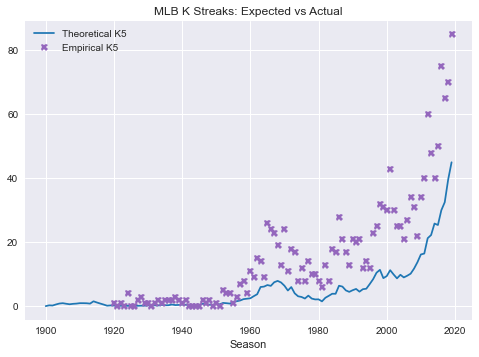

In [109]:
ax = sp_data_fg.plot(y='E_K5', legend=None, color='tab:blue', label='Theoretical K5');
ax.plot(final_counts, 'X', color='tab:purple', label='Empirical K5');
ax.set_title('MLB K Streaks: Expected vs Actual');
ax.legend();

The rough hypothesis discussed in the previous section was that the static inputs to our model don't account for variation among the pitching population, and that would likely result in an occurence rate higher than predicted.

Just for fun, let's toy with the 'K rate' a bit, and see how much better the fit is:

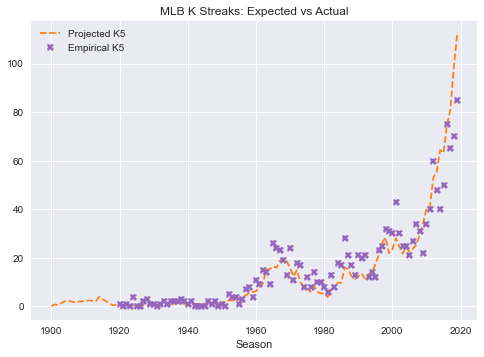

In [152]:
proj_df = sp_data_fg.copy()
mult = 1.2
proj_df['K_rt_proj'] = proj_df.K_rt_SP * mult
proj_df['E_K5_proj'] = proj_df.GS*(proj_df.BF_per_start_est-4)*proj_df.K_rt_proj**5
ax = proj_df.plot(y='E_K5_proj', linestyle='--', legend=None, color='tab:orange', label='Projected K5');
ax.plot(final_counts, 'X', color='tab:purple', label='Empirical K5');
ax.set_title('MLB K Streaks: Expected vs Actual');
ax.legend();

Looks like giving the 'K rate' a 20% boost results in a nearly perfect fit. If we extrapolate this slightly, we can see that if current trends hold, the frequency of K streaks will double again in the next five years:

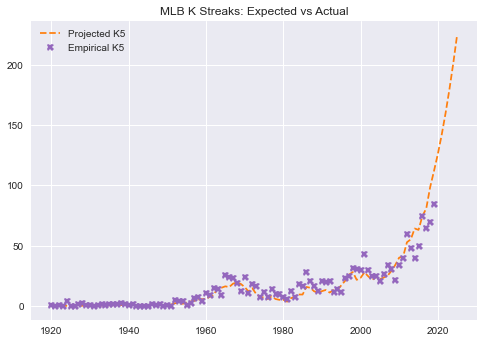

In [151]:
extension = pd.Series(proj_df.E_K5_proj, index=range(1920, 2026))
extension[2025] = 225
extension.interpolate(method='quadratic', limit=25, inplace=True)
extension
ax = extension.plot(linestyle='--', legend=None, color='tab:orange', label='Projected K5');
ax.plot(final_counts, 'X', color='tab:purple', label='Empirical K5');
ax.set_title('MLB K Streaks: Expected vs Actual');
ax.legend();